<a href="https://colab.research.google.com/github/SaugatHui/Machine-Learning-Project/blob/ML-Internship-Project/Saugat_Hui_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns # For visualisation
import matplotlib.pyplot as plt # For visualisation
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
# Reading Data in python
df = pd.read_csv("data.csv")
# To display the top 10  rows
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [ ]:
# To display the botton 10 rows
df.tail(10)   

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
# Checking the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Checking the summary stats
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Dropping irrelevant columns
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head(10)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [ ]:
# Renaming the columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(10)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [ ]:
# Total rows and columns
df.shape

(11914, 13)

In [ ]:
# Checking the duplicate rows
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape)

No. of duplicate rows:  (792, 13)


In [ ]:
# Dropping the duplicate rows
df = df.drop_duplicates()
df.head(10)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [ ]:
# Counting the number of rows after removing duplicates.
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

In [ ]:
# Checking the null values
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

In [ ]:
# Removing the Null values
df = df.dropna()    
df.count() 

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [ ]:
# After dropping the null values
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

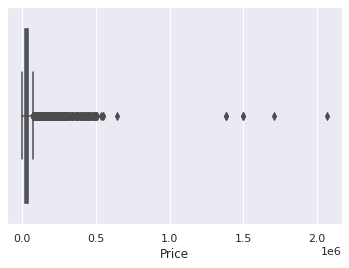

In [ ]:
# Plotting graphs of the columns to detect the outliers
sns.boxplot(x=df['Price'])

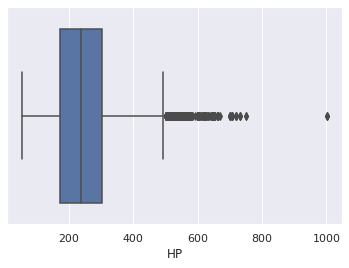

In [ ]:
sns.boxplot(x=df['HP'])

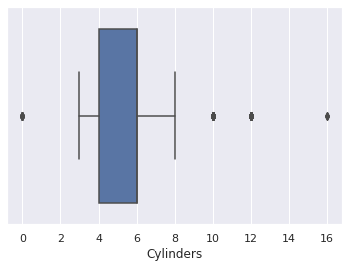

In [ ]:
sns.boxplot(x=df['Cylinders'])

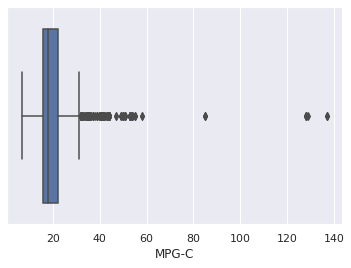

In [ ]:
sns.boxplot(x=df['MPG-C'])

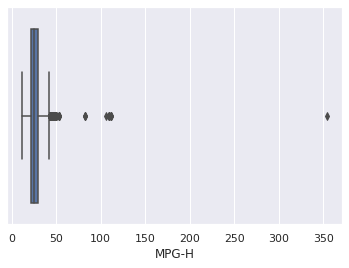

In [ ]:
sns.boxplot(x=df['MPG-H'])

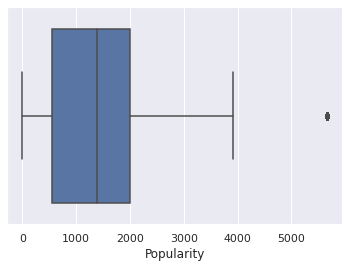

In [ ]:
sns.boxplot(x=df['Popularity'])

In [ ]:
#Finding IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [ ]:
#Removing Outliners
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Total rows and columns after dropping the outliers
df.shape

(8546, 13)

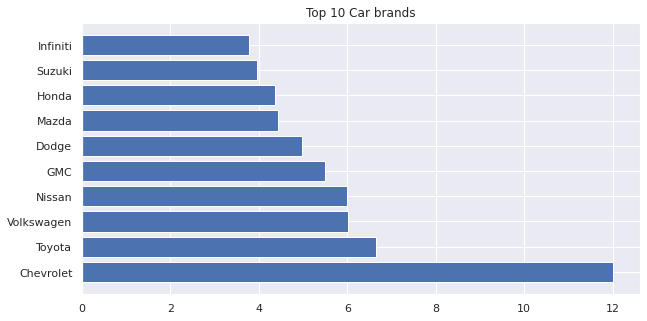

In [ ]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [ ]:
# Average price of the top 10 car brands
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Mazda')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Suzuki')|
               (df['Make'] == 'Infiniti')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Infiniti    43127.822981
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18168.241888
Toyota      27769.421793
Volkswagen  29032.817476


In [ ]:
#Correlation Matrix
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


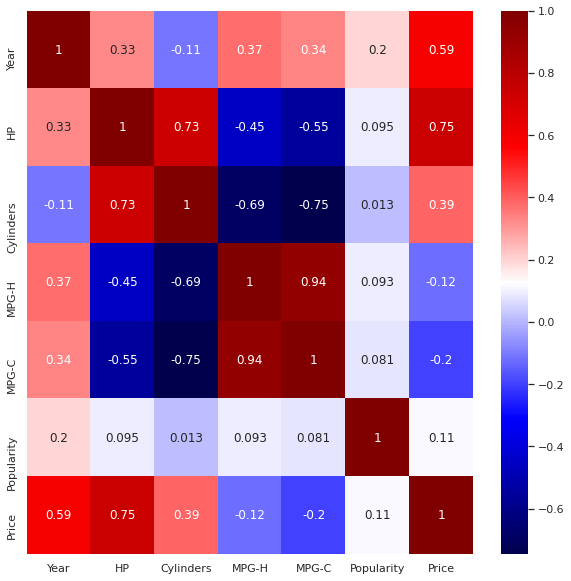

In [ ]:
# Plotting Correlation Matrix
plt.figure(figsize=(10,10))
corr_mat= df.corr()
sns.heatmap(corr_mat,cmap="seismic",annot=True)

# ***From the above heatmap, we conclude that;***


*   Price is positively dependent on  Horse Power(HP) and Year.
*   HP and Cylinders are positively dependent on each other.
*   MPG-H and MPG-C have strong negative correlation with Cylinders.
*   MPG-H and MPG-C have negative correlation with HP.





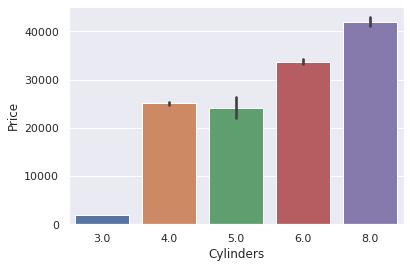

In [ ]:
# Plots between different columns
sns.barplot(df['Cylinders'],df['Price'])

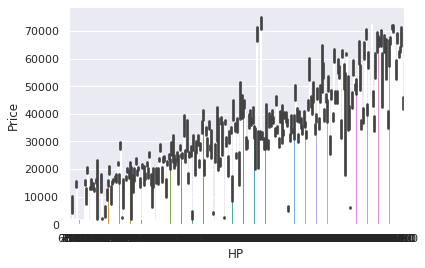

In [ ]:
sns.barplot(df['HP'],df['Price'])

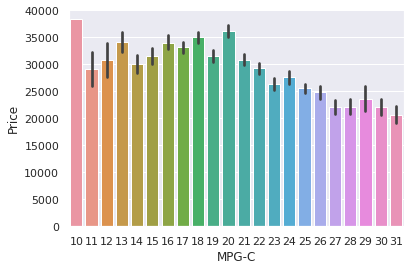

In [ ]:
sns.barplot(df['MPG-C'],df['Price'])

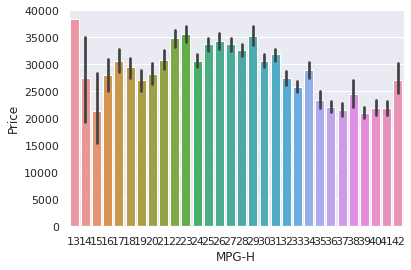

In [ ]:
sns.barplot(df['MPG-H'],df['Price'])

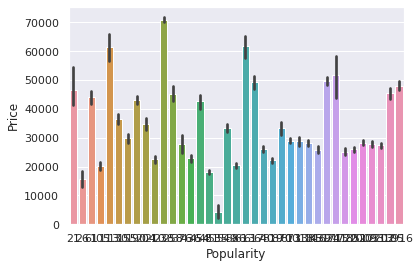

In [ ]:
sns.barplot(df['Popularity'],df['Price'])

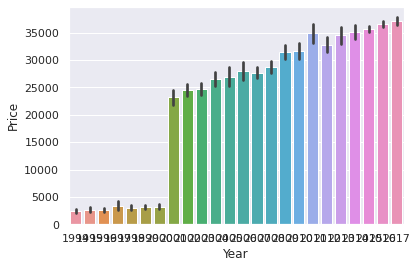

In [ ]:
sns.barplot(df['Year'],df['Price'])

In [ ]:
dcc = df.select_dtypes(exclude=[np.number]).columns
dcc

Index(['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size',
       'Vehicle Style'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc = LabelEncoder()
for i in dcc:
  df[i] = label_enc.fit_transform(df[i])
print('Label Encoded Data')
df.head(10)  

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,3,1,2011,335.0,6.0,2,3,0,8,26,19,3916,46135
1,3,0,2011,300.0,6.0,2,3,0,6,28,19,3916,40650
2,3,0,2011,300.0,6.0,2,3,0,8,28,20,3916,36350
3,3,0,2011,230.0,6.0,2,3,0,8,28,18,3916,29450
4,3,0,2011,230.0,6.0,2,3,0,6,28,18,3916,34500
5,3,0,2012,230.0,6.0,2,3,0,8,28,18,3916,31200
6,3,0,2012,300.0,6.0,2,3,0,6,26,17,3916,44100
7,3,0,2012,300.0,6.0,2,3,0,8,28,20,3916,39300
8,3,0,2012,230.0,6.0,2,3,0,6,28,18,3916,36900
9,3,0,2013,230.0,6.0,2,3,0,6,27,18,3916,37200


In [ ]:
#Setting Target Value
y = df['Price']

In [ ]:
# Creating training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6836, 13) (6836,)
(1710, 13) (1710,)


In [ ]:
#Fit in a model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

[Text(0, 0.5, 'Predictions'), Text(0.5, 0, 'True Values')]

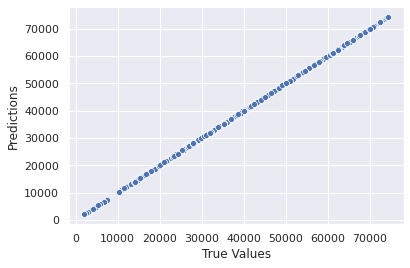

In [ ]:
#Plotting the Predictions
ax=sns.scatterplot(y_test, predictions)
ax.set(xlabel = "True Values", ylabel = "Predictions")

In [ ]:
print ('Score:'), model.score(X_test, y_test)

Score:


(None, 1.0)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
d_m = DecisionTreeClassifier(random_state = 0)
d_m.fit(X_train,y_train)
y_pred = d_m.predict(X_test)
print("Confusion Matrix:\n\n", confusion_matrix(y_test, y_pred)) 
print ("\nAccuracy : ", accuracy_score(y_test,y_pred)*100)


Confusion Matrix:

 [[55  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]

Accuracy :  32.046783625730995


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination or R Squared : %.2f' % r2_score(y_test, y_pred))
print('MAE :%.2f' % mean_absolute_error(y_test, y_pred))
print('RMSE : %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 156576.22
Coefficient of determination or R Squared : 1.00
MAE :84.61
RMSE : 395.70
